In [1]:
import pandas as pd
import numpy as np
import json
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

# 1. Load data

In [2]:
df_orders = pd.read_csv('/gh/data/personal-data-requests/amazon/orders_and_shipments.csv')
cols_keep = ['Order Date', 'Shipment Date', 'Total Charged']
df_orders = df_orders[cols_keep]
df_orders.head()

,Order Date,Shipment Date,Total Charged
0,12/03/10,12/06/10,$4.00
1,12/03/10,12/04/10,$20.49
2,12/17/10,12/19/10,$40.97
3,12/17/10,12/21/10,$43.99
4,12/17/10,12/21/10,$40.49


In [3]:
df_items = pd.read_csv('/gh/data/personal-data-requests/amazon/items.csv')
df_items['total'] = [float(x[1:]) for x in df_items['Item Total']]
df_items['dt'] = pd.to_datetime(df_items['Order Date'])
df_items['year'] = df_items['dt'].dt.year
cols_keep = ['dt', 'year', 'Title', 'Category', 'total']
df_items = df_items[cols_keep]
df_items.head()

,dt,year,Title,Category,total
0,2010-12-03,2010,Responding to Literature: A Writer's Journal,Paperback,0.01
1,2010-12-03,2010,Introduction to Chemical Process: Fundamentals...,Paperback,16.50
2,2010-12-17,2010,Student Solutions Manual for Stewart's Multiva...,Paperback,36.98
3,2010-12-17,2010,"Longman Anthology of British Literature, Volum...",Paperback,40.00
4,2010-12-17,2010,"Longman Anthology of British Literature, Volum...",Paperback,36.50


# 2a. Distribution of orders per category

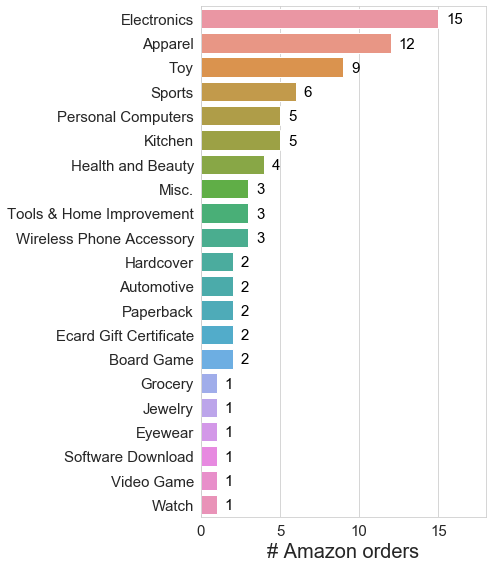

In [7]:
# Prep data to plot
df_plt = df_items[df_items['year'] >= 2014]
df_plt = df_plt.groupby(['Category'])['total'].count().reset_index().rename(columns={'total': 'count'})
df_plt = df_plt.sort_values('count', ascending=False).reset_index(drop=True)

# Plot bars
plt.figure(figsize=(7,8))
g=sns.barplot(x='count', y='Category', data=df_plt)

# Plot numbers
for index, row in df_plt.iterrows():
    g.text(x=row['count'] + .5,
           y=index + .2,
           s=row['count'],
           color='black',
           ha="left",
           size=15
          )

plt.ylabel('')
plt.xlabel('# Amazon orders')
plt.xlim((0,18))
plt.tight_layout()

plt.savefig('/gh/srcole.github.io/assets/personaldata/amazon_order_categories.png')

# 2b. Money spent in each category

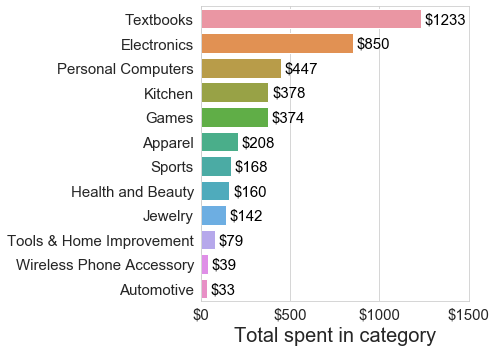

In [5]:
# Prep data to plot
min_spend = 25
df_plt = df_items.replace({'Toy': 'Games',
                           'Board Game': 'Games',
                           'Hardcover': 'Textbooks',
                           'Paperback': 'Textbooks'})
df_plt = df_plt.groupby(['Category'])['total'].sum().reset_index().rename(columns={'total': 'spent'})
df_plt = df_plt[~df_plt['Category'].isin(['Ecard Gift Certificate', 'Misc.'])]
df_plt['spent'] = df_plt['spent'].astype(int)
df_plt = df_plt[df_plt['spent'] > min_spend]
df_plt = df_plt.sort_values('spent', ascending=False).reset_index(drop=True)

# Plot bars
plt.figure(figsize=(7,5))
g=sns.barplot(x='spent', y='Category', data=df_plt)

# Plot numbers
for index, row in df_plt.iterrows():
    g.text(x=row['spent'] + 20,
           y=index + .2,
           s='$' + str(row['spent']),
           color='black',
           ha="left",
           size=15
          )

plt.ylabel('')
plt.xlabel('Total spent in category')
plt.xticks(np.arange(0, 1501, 500))
plt.xlim((0,1500))

# dollar ticks
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()

plt.savefig('/gh/srcole.github.io/assets/personaldata/amazon_spent.png')